# Separação de Dados: Treinamento, Validação e Teste

Na ciência de dados e no aprendizado de máquina, a separação dos dados em conjuntos de treinamento, validação e teste é uma prática essencial para garantir a generalização e a precisão dos modelos. Vamos detalhar cada um desses conjuntos:

1. Conjunto de Treinamento (Training Set)

    <span style="font-size: 14px;">
    O conjunto de treinamento é usado para ajustar os parâmetros do modelo. O modelo "aprende" a partir desses dados, identificando padrões e ajustando seus parâmetros para minimizar o erro.<br></br>
    
    * **Finalidade**: Treinar o modelo.
    * **Processo**: Os dados são alimentados no algoritmo de aprendizado de máquina, que ajusta seus parâmetros para se adequar a esses dados.
    </span>
    <br></br>

2. Conjunto de Validação (Validation Set)

    <span style="font-size: 14px;">
    O conjunto de validação é usado para ajustar os hiperparâmetros do modelo e para a seleção do modelo. Este conjunto ajuda a evitar o overfitting, que ocorre quando o modelo se ajusta muito bem aos dados de treinamento, mas não se generaliza bem para novos dados.
    <br></br>

    * **Finalidade**: Validar e ajustar hiperparâmetros do modelo.
    * **Processo**: Após o treinamento, o modelo é avaliado no conjunto de validação. Os hiperparâmetros são ajustados para melhorar o desempenho do modelo neste conjunto.
    </span>
    <br></br>

3. Conjunto de Teste (Test Set)

    <span style="font-size: 14px;">
    O conjunto de teste é usado para avaliar o desempenho final do modelo. Este conjunto nunca é usado durante o treinamento ou a validação do modelo e serve como uma medida objetiva da performance do modelo em dados não vistos.
    <br></br>

    * **Finalidade**: Avaliar a performance final do modelo.
    * **Processo**: Após o modelo ser treinado e validado, ele é testado no conjunto de teste para obter uma estimativa realista de seu desempenho em dados novos.
    </span>
    <br></br>

Durante a separação dos dados, é importante entender que o tipo de problema influencia na forma como eles serão particionados, gerando assim diferentes tipos de separação, onde algumas delas serão tratadas a seguir.

### Dados com Divisão Aleatória

A divisão dos dados é feita aleatoriamente para garantir a representatividade de toda a distribuição dos dados nos conjuntos de treino, validação e teste. É o tipo de divisão mais comúm, e é essencial para que o modelo possa aprender de forma eficaz e generalizar bem para novos dados.

##### Gerando dados aleatórios para exemplo

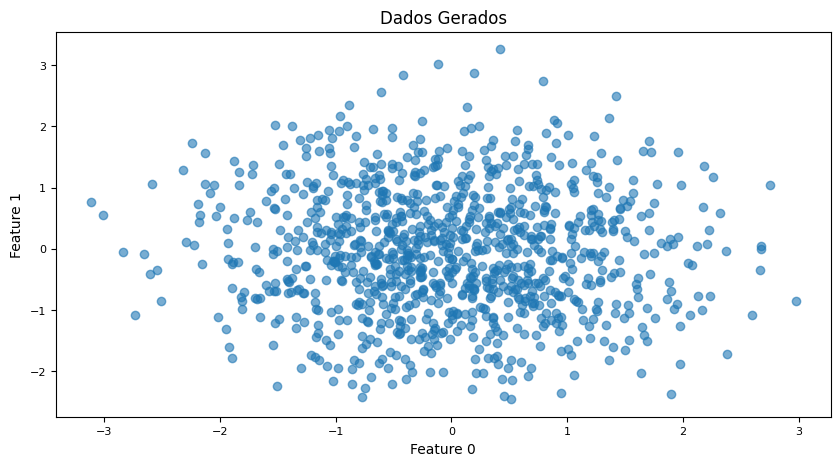

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Número de amostras
n_samples = 1000
n_features = 5  # Número de características

# Configurações de gerador aleatório
rng = np.random.default_rng(seed=0)

# Gerar características aleatórias
X = rng.normal(loc=0, scale=1, size=(n_samples, n_features))

# Gerar rótulos binários aleatórios
y = rng.integers(low=0, high=2, size=n_samples)

# Criar DataFrame com dados
data = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(n_features)])
data['Label'] = y

# Plotar os dados
plt.figure(figsize=(10, 5))

# Plotar dados de treino
plt.scatter(data['Feature_0'], data['Feature_1'], label='Treino', alpha=0.6)

plt.title('Dados Gerados', fontsize=12)
plt.xlabel('Feature 0', fontsize=10)
plt.xticks(fontsize=8)
plt.ylabel('Feature 1', fontsize=10)
plt.yticks(fontsize=8)
plt.show()

##### Aplicando divisão de dados: Treinamento, Validação e Teste

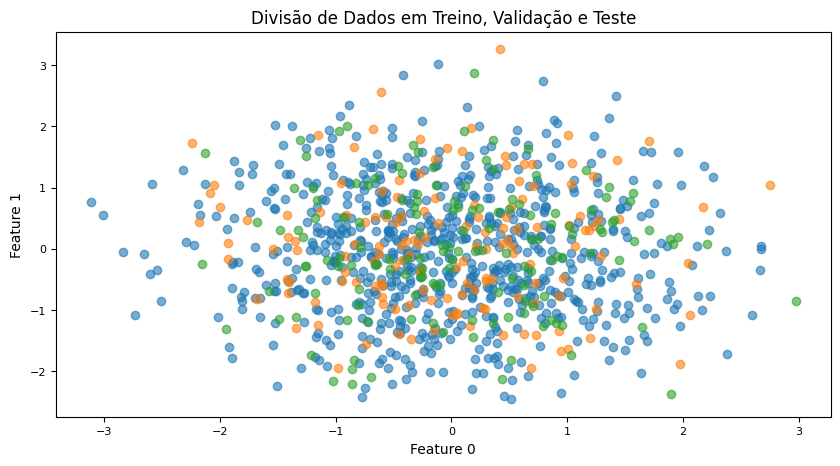

In [2]:
from sklearn.model_selection import train_test_split

# Dividir os dados em treino, validação e teste
train_size = 0.7
validation_size = 0.15
test_size = 0.15

# Dividir dados em treino e restante (validação + teste)
X_train, X_temp, y_train, y_temp = train_test_split(data.drop('Label', axis=1), data['Label'], train_size=train_size, random_state=0)

# Dividir o restante em validação e teste
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Opcional: salvar em novos DataFrames para uso posterior
train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
validation_data = pd.concat([X_validation, y_validation.reset_index(drop=True)], axis=1)
test_data = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)

# Plotar os dados
plt.figure(figsize=(10, 5))

# Plotar dados de treino
plt.scatter(train_data['Feature_0'], train_data['Feature_1'], label='Treino', alpha=0.6)

# Plotar dados de validação
plt.scatter(validation_data['Feature_0'], validation_data['Feature_1'], label='Validação', alpha=0.6)

# Plotar dados de teste
plt.scatter(test_data['Feature_0'], test_data['Feature_1'], label='Teste', alpha=0.6)

plt.title('Divisão de Dados em Treino, Validação e Teste', fontsize=12)
plt.xlabel('Feature 0', fontsize=10)
plt.xticks(fontsize=8)
plt.ylabel('Feature 1', fontsize=10)
plt.yticks(fontsize=8)
plt.show()

### Dados Temporais (Time Series)

Para dados que possuem uma dimensão temporal, como séries financeiras ou dados climáticos, é importante respeitar a ordem cronológica. Normalmente, você seleciona os dados mais antigos para treinamento e os mais recentes para teste, para simular como o modelo se comportaria em previsões futuras.

##### Dados de série temporal para exemplo: Treinamento, Validação e Teste

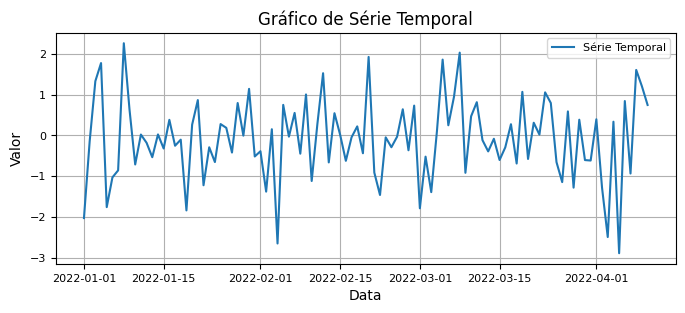

In [3]:
# Definindo o período de tempo
date_range = pd.date_range(start='2022-01-01', 
                           end='2022-04-10', 
                           freq='D')

# Número de dias da série temporal
dias = len(date_range)

# Gerando valores aleatórios para série temporal com distribuição normal
values = np.random.randn(dias) 

# Criando o DataFrame
time_series = pd.DataFrame({'Date': date_range, 'Value': values})

# Definindo a coluna 'Date' como índice
time_series.set_index('Date', inplace=True)

# Plotando a série temporal
plt.figure(figsize=(8, 3))
plt.plot(time_series.index, time_series['Value'], label='Série Temporal')
plt.title('Gráfico de Série Temporal', fontsize=12)
plt.xlabel('Data', fontsize=10)
plt.xticks(fontsize=8)
plt.ylabel('Valor', fontsize=10)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

##### Aplicando divisão de dados

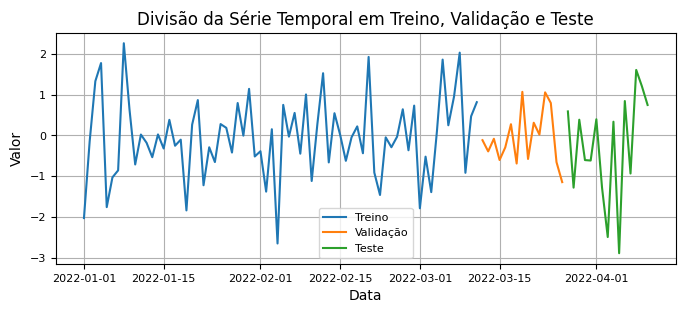

In [4]:
# Dividindo os dados para 100 dias
train_data = time_series[:int(dias * 0.7)] # 70% para treinamento
validation_data = time_series[int(dias * 0.7):int(dias * 0.85)] # 15% para validação
test_data = time_series[int(dias * 0.85):] # 15% para teste

# Plotando os dados
plt.figure(figsize=(8, 3))

# Plotando dados de treino
plt.plot(train_data.index, train_data['Value'], label='Treino')

# Plotando dados de validação
plt.plot(validation_data.index, validation_data['Value'], label='Validação')

# Plotando dados de teste
plt.plot(test_data.index, test_data['Value'], label='Teste')

plt.title('Divisão da Série Temporal em Treino, Validação e Teste', fontsize=12)
plt.xlabel('Data', fontsize=10)
plt.xticks(fontsize=8)
plt.ylabel('Valor', fontsize=10)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)
plt.grid(True)
plt.show()

### Dados Geográficos ou Espaciais

Dados que contêm informação geográfica podem apresentar variações regionais. Uma divisão geográfica pode ser necessária, onde regiões diferentes são usadas para treino e teste para avaliar a capacidade do modelo de generalizar para novas localizações. É importante entender as características do que será predito para não cometer o erro de tornar aleatória a divisão dos dados, quando na verdade uma divisão mais especializada deveria ser feita.

##### Dados espaciais para exemplo: Treinamento, Validação e Teste

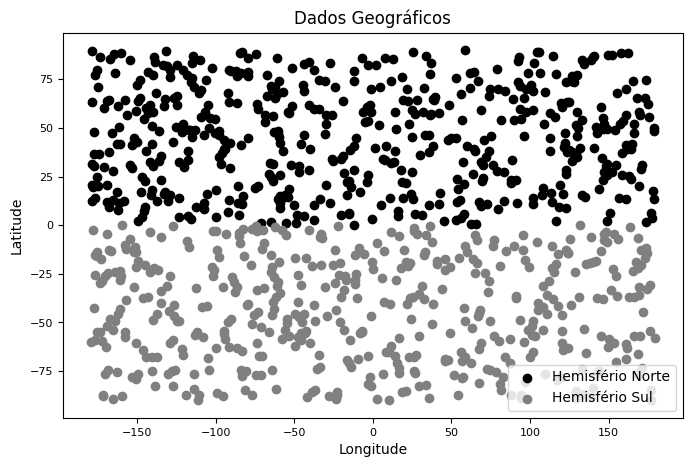

In [5]:
# Número de amostras
n_samples = 1000

# Configurações de gerador aleatório
rng = np.random.default_rng(seed=0)

# Criar DataFrame com dados geográficos
data = pd.DataFrame({'Latitude': rng.uniform(low=-90, high=90, size=n_samples),
                     'Longitude': rng.uniform(low=-180, high=180, size=n_samples),
                     'Value': rng.normal(loc=0, scale=1, size=n_samples)})  # Valores associados às coordenadas

latitude_cutoff = 0  # Ponto de corte para dividir as regiões

# Dados do hemisfério norte e sul
north_data = data[data['Latitude'] >= latitude_cutoff]
south_data = data[data['Latitude'] < latitude_cutoff]

# Plotar os dados
plt.figure(figsize=(8, 5))

# Plotar dados do hemisfério norte
plt.scatter(north_data['Longitude'], north_data['Latitude'], color='black', label='Hemisfério Norte')

# Plotar dados do hemisfério sul
plt.scatter(south_data['Longitude'], south_data['Latitude'], color='grey', label='Hemisfério Sul')

plt.title('Dados Geográficos', fontsize=12)
plt.xlabel('Longitude', fontsize=10)
plt.xticks(fontsize=8)
plt.ylabel('Latitude', fontsize=10)
plt.yticks(fontsize=8)
plt.legend()
plt.show()


##### Aplicando divisão de dados

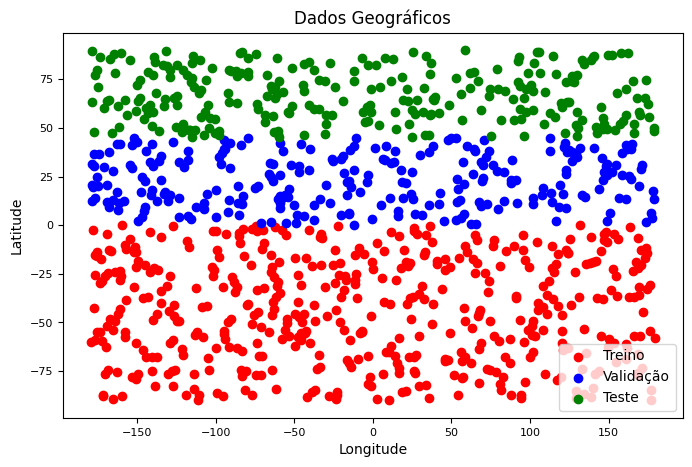

In [6]:
# Dividir os dados com base na latitude em três regiões
# 50% dos dados do sul para treino
latitude_cutoff1 = 0  # 25% dos dados norte para validação
latitude_cutoff2 = 45  # 25% dos dados do norte para teste

# Dados de treino, validação e teste
train_data = data[data['Latitude'] < latitude_cutoff1]
validation_data = data[(data['Latitude'] >= latitude_cutoff1) & (data['Latitude'] < latitude_cutoff2)]
test_data = data[data['Latitude'] >= latitude_cutoff2]

# Plotar os dados
plt.figure(figsize=(8, 5))

# Plotar dados de treino
plt.scatter(train_data['Longitude'], train_data['Latitude'], color='red', label='Treino')

# Plotar dados de validação
plt.scatter(validation_data['Longitude'], validation_data['Latitude'], color='blue', label='Validação')

# Plotar dados de teste
plt.scatter(test_data['Longitude'], test_data['Latitude'], color='green', label='Teste')

plt.title('Dados Geográficos', fontsize=12)
plt.xlabel('Longitude', fontsize=10)
plt.xticks(fontsize=8)
plt.ylabel('Latitude', fontsize=10)
plt.yticks(fontsize=8)
plt.legend()
plt.show()

### Outros tipos de divisão de dados

* Dados de Usuários ou Pacientes:

    Em estudos onde cada ponto de dados está associado a um usuário ou paciente, é importante garantir que dados de um mesmo usuário ou paciente não estejam presentes nos conjuntos de treino e teste. Isso é conhecido como divisão por identificador único.

* Dados de Imagens ou Texto com Contexto:

    Em tarefas onde o contexto é importante, como análise de sentimentos em textos ou reconhecimento de objetos em imagens, é necessário garantir que o contexto seja representado em ambos os conjuntos de dados. Por exemplo, não colocar todos os dados de um determinado assunto apenas no conjunto de teste.

* Dados com Distribuição Desbalanceada:

    Quando há uma distribuição desigual entre as classes, é essencial manter a mesma proporção de classes em todos os conjuntos de dados para que o modelo seja treinado e testado de maneira consistente.

* Dados com Relações Causais:

    Em cenários onde há uma relação causal entre variáveis, é importante considerar essa relação ao dividir os dados. Por exemplo, em dados de saúde, onde a intervenção médica pode afetar o resultado, é preciso garantir que a intervenção não vaze do conjunto de treino para o de teste.

Existem outros inúmeros tipos de dados que necessitam de outras divisões para predição diferente do que se é mais comúm ou usual. Por isso é importante sempre entender de que tipo de dado se está ligando, para que a predição não seja comprometida.